# Customer Churn Prediction and Analysis

Data collection:
from kaggle : https://www.kaggle.com/datasets/blastchar/telco-customer-churn 

Importing lybraries.

In [181]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker  
from matplotlib import style  

In [182]:
# Set Seaborn Aesthetics
sns.set(rc={'figure.figsize': [10, 10]},font_scale=1.3)

In [183]:
# Load Dataset
# The dataset contains information about customers and their churn status, along with demographic and usage details.
df = pd.read_csv(r"C:\Users\sh2\Downloads\ai\final project\archive (11)\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [184]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [185]:
#Provides an overview of the dataset, including data types and non-null counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [186]:
# Displays summary statistics for numerical columns.
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Initial Dataset Exploration.
    
Understanding the structure and summary statistics of the dataset.

In [187]:
# Calculate the total number of missing values
df.isnull().sum().sum()

0

                                                            "Preprocessing Problems" 
TotalCharges column need be numeric not object.

categorical columns  must be converted:

-Binary columns like "gender", "Partner", "Churn" must be converted to 0/1.

-Multiclass columns like "InternetService", "Contract", and "PaymentMethod" were one-hot encoded.

scale numerical features to ensure they contribute equally, preventing larger ranges (e.g., TotalCharges) from dominating smaller ones (e.g., tenure), improving model performance.

In [188]:
# Convert 'TotalCharges' to numeric, coercing errors to NaN (to handle empty strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values in 'TotalCharges' with median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

Convert TotalCharges column to numeric Fill missing values in it.

Reason of using Median is robust to outliers and maintains data integrity.

In [189]:
#droping customerID column
df = df.drop(columns=['customerID'], errors='ignore')

Drop Irrelevant Columns 'customerID column'
Reason: 'customerID' is a unique identifier and does not contribute to predictive analysis.

In [190]:
df['TotalCharges'].describe()

count    7043.000000
mean     2281.916928
std      2265.270398
min        18.800000
25%       402.225000
50%      1397.475000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [191]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

#Separate binary and multiclass columns
binary_cols = [col for col in categorical_cols if df[col].nunique() == 2]
multiclass_cols = [col for col in categorical_cols if col not in binary_cols]

#Convert binary categorical variables into numerical for compatibility with models.
binary_mapping = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}
for col in binary_cols:
    df[col] = df[col].map(binary_mapping)
    
#One-Hot Encoding for Multiclass Columns
#Convert multiclass categorical variables into dummy variables for analysis.
df = pd.get_dummies(df, columns=multiclass_cols, drop_first=True)
print(df.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


Splitting categorical columns into binary and multiclass for appropriate encoding.

In [192]:
from sklearn.preprocessing import MinMaxScaler
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
# Initialize Min-Max Scaler
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

Min-Max Scaling transforms each feature by scaling it to a fixed range, usually between **0 and 1**.

In [193]:
df.drop_duplicates(inplace=True)

Droping duplicates to Ensure dataset integrity by eliminating duplicate entries.

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7021 non-null   int64  
 1   SeniorCitizen                          7021 non-null   int64  
 2   Partner                                7021 non-null   int64  
 3   Dependents                             7021 non-null   int64  
 4   tenure                                 7021 non-null   float64
 5   PhoneService                           7021 non-null   int64  
 6   PaperlessBilling                       7021 non-null   int64  
 7   MonthlyCharges                         7021 non-null   float64
 8   TotalCharges                           7021 non-null   float64
 9   Churn                                  7021 non-null   int64  
 10  MultipleLines_No phone service         7021 non-null   bool   
 11  MultipleL

In [195]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.504344,0.162512,0.484546,0.300527,0.450965,0.902863,0.592651,0.463700,0.261961,0.264492
std,0.500017,0.368947,0.499797,0.458520,0.340763,0.296166,0.491376,0.299194,0.261403,0.441094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.125000,1.000000,0.000000,0.174129,0.045275,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.402778,1.000000,1.000000,0.518905,0.159445,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.763889,1.000000,1.000000,0.712935,0.436522,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Confirm successful cleaning and preprocessing.

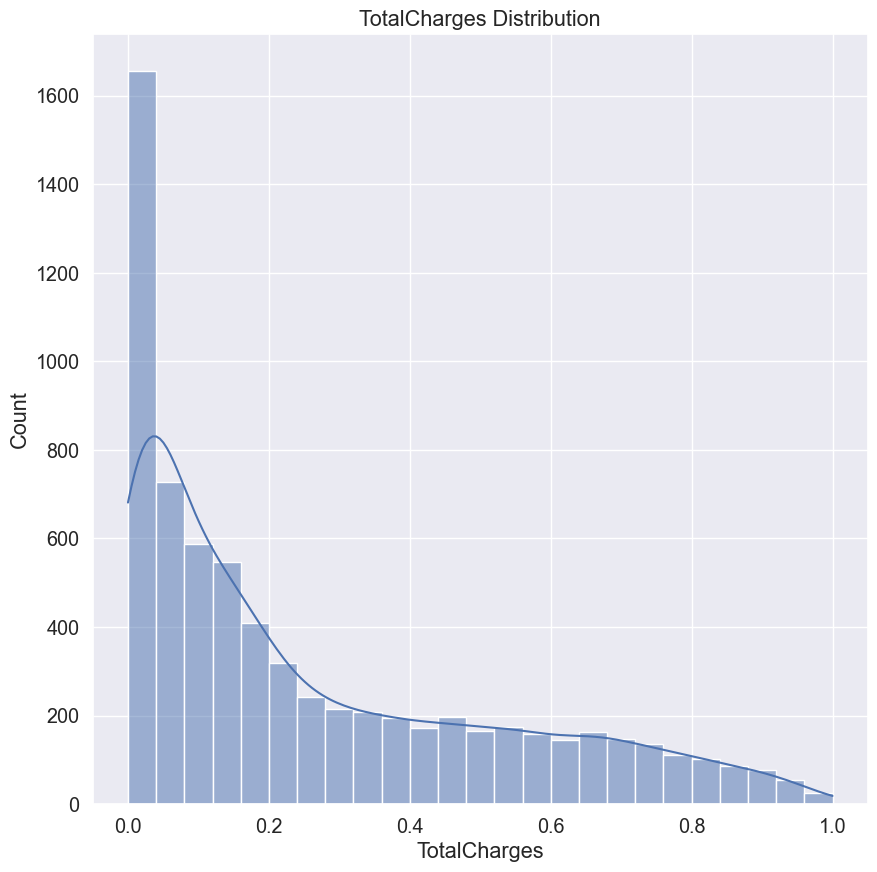

In [196]:
sns.histplot(df['TotalCharges'], kde=True)
plt.title('TotalCharges Distribution')
plt.show()

generatin a histogram of the 'TotalCharges' variable, enhanced with a KDE curve for better visualization of its distribution.
The title of the plot provides context, and invoking plt.show() displays the resulting plot.

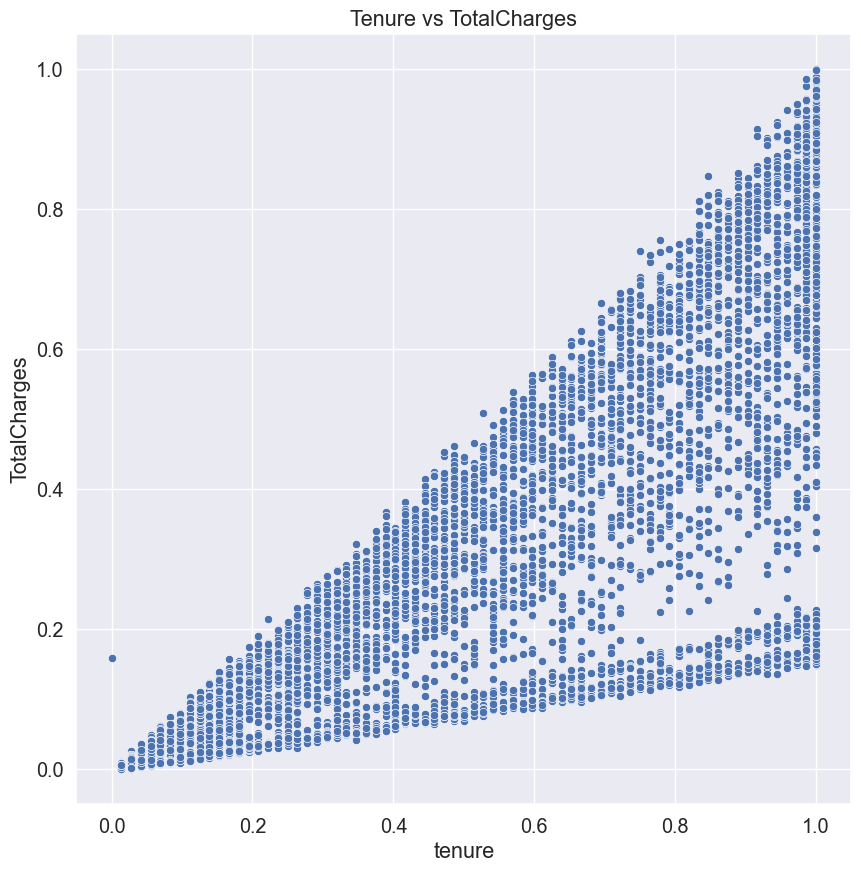

In [197]:
sns.scatterplot(x='tenure', y='TotalCharges', data=df)
plt.title('Tenure vs TotalCharges')
plt.show()

generating a scatter plot that visualizes the relationship between customer tenure and total charges. 
The title of the plot provides clarity about what is being shown, and plt.show() renders the plot for viewing.

In [198]:
df.corr(numeric_only=True)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,-0.001125,-0.001014,0.011081,0.006185,-0.006769,-0.011350,-0.013158,0.000827,-0.008763,...,-0.008703,0.004457,-0.007760,0.004457,-0.009856,0.008466,-0.003237,0.001651,0.001358,0.012280
SeniorCitizen,-0.001125,1.000000,0.015553,-0.212115,0.015349,0.008909,0.156196,0.219434,0.101886,0.151619,...,-0.061338,-0.181940,0.104765,-0.181940,0.119584,-0.046823,-0.117694,-0.024683,0.171347,-0.152338
Partner,-0.001014,0.015553,1.000000,0.451659,0.377346,0.018728,-0.015776,0.094301,0.316311,-0.149135,...,0.118311,0.003720,0.122572,0.003720,0.115284,0.081379,0.246870,0.080592,-0.084500,-0.092031
Dependents,0.011081,-0.212115,0.451659,1.000000,0.157603,-0.001092,-0.112220,-0.116191,0.061698,-0.163459,...,0.062039,0.142531,-0.018207,0.142531,-0.041441,0.067388,0.203697,0.059256,-0.151232,0.061789
tenure,0.006185,0.015349,0.377346,0.157603,1.000000,0.009786,0.005053,0.245251,0.824875,-0.351508,...,0.322694,-0.035206,0.277575,-0.035206,0.283932,0.201110,0.557984,0.231597,-0.209731,-0.230606
PhoneService,-0.006769,0.008909,0.018728,-0.001092,0.009786,1.000000,0.016824,0.248984,0.114225,0.011323,...,-0.095761,0.171839,-0.021788,0.171839,-0.032179,-0.002264,0.004099,-0.007187,0.003204,-0.004555
PaperlessBilling,-0.011350,0.156196,-0.015776,-0.112220,0.005053,0.016824,1.000000,0.351125,0.157678,0.190891,...,0.037407,-0.319512,0.223753,-0.319512,0.211593,-0.051954,-0.148714,-0.014080,0.208011,-0.203954
MonthlyCharges,-0.013158,0.219434,0.094301,-0.116191,0.245251,0.248984,0.351125,1.000000,0.650341,0.194508,...,0.337366,-0.762552,0.629272,-0.762552,0.627082,0.003371,-0.076580,0.029055,0.270444,-0.374214
TotalCharges,0.000827,0.101886,0.316311,0.061698,0.824875,0.114225,0.157678,0.650341,1.000000,-0.197911,...,0.431283,-0.373486,0.514119,-0.373486,0.518725,0.169382,0.355201,0.181471,-0.060589,-0.292713
Churn,-0.008763,0.151619,-0.149135,-0.163459,-0.351508,0.011323,0.190891,0.194508,-0.197911,1.000000,...,-0.163937,-0.228533,0.065032,-0.228533,0.063192,-0.177336,-0.302076,-0.133666,0.301544,-0.092562


checks the correlation between numerical variables in the dataset.

**1. Univariate Analysis

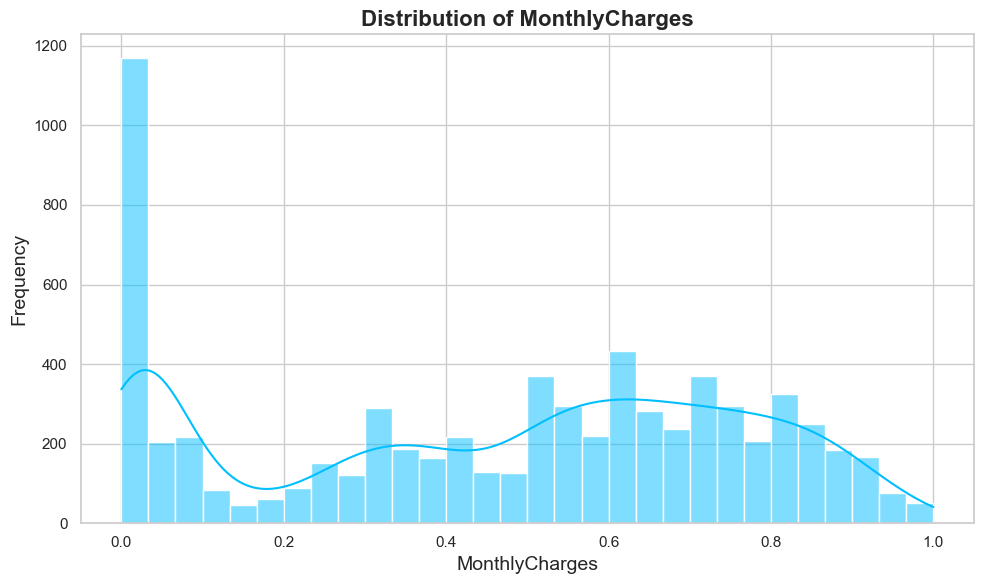

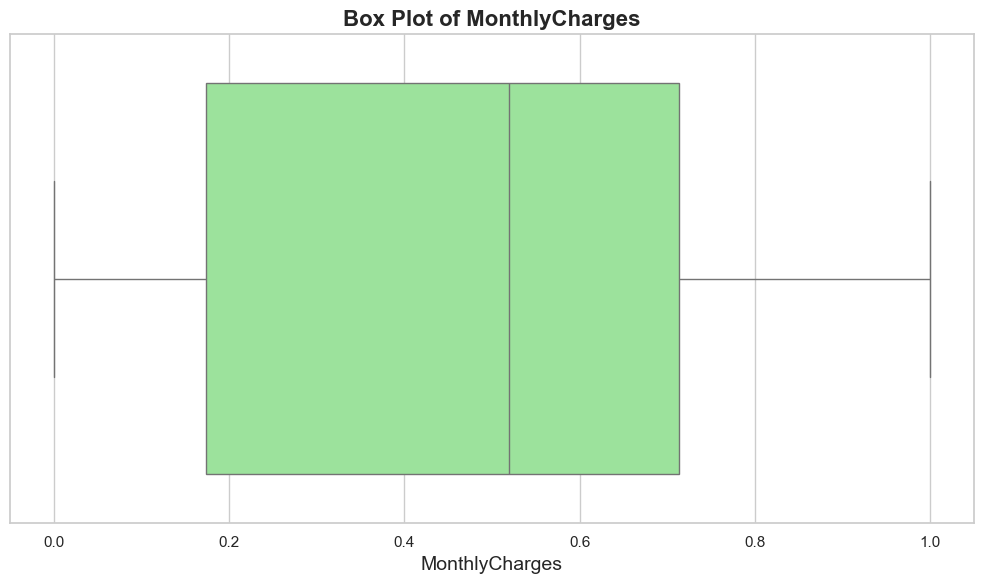

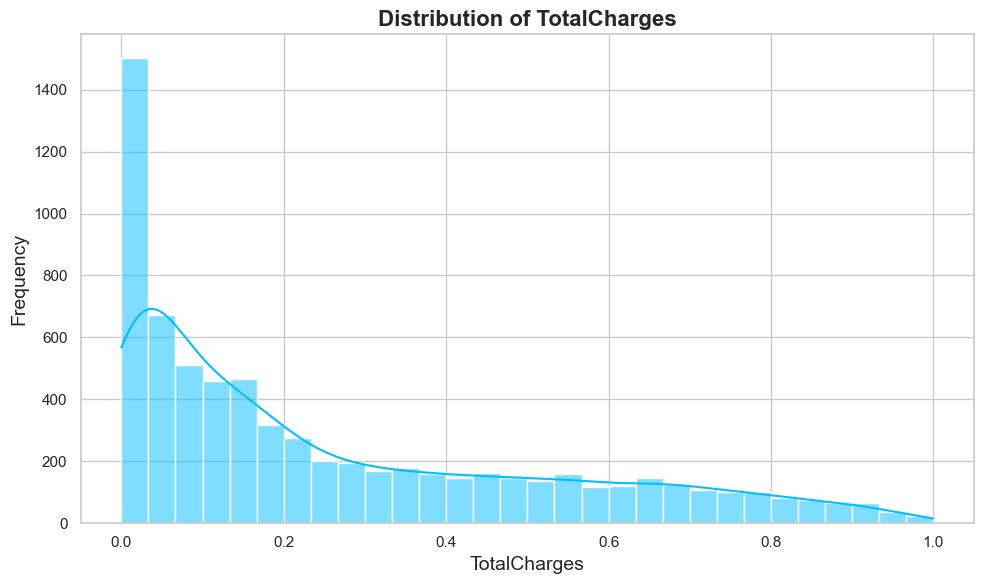

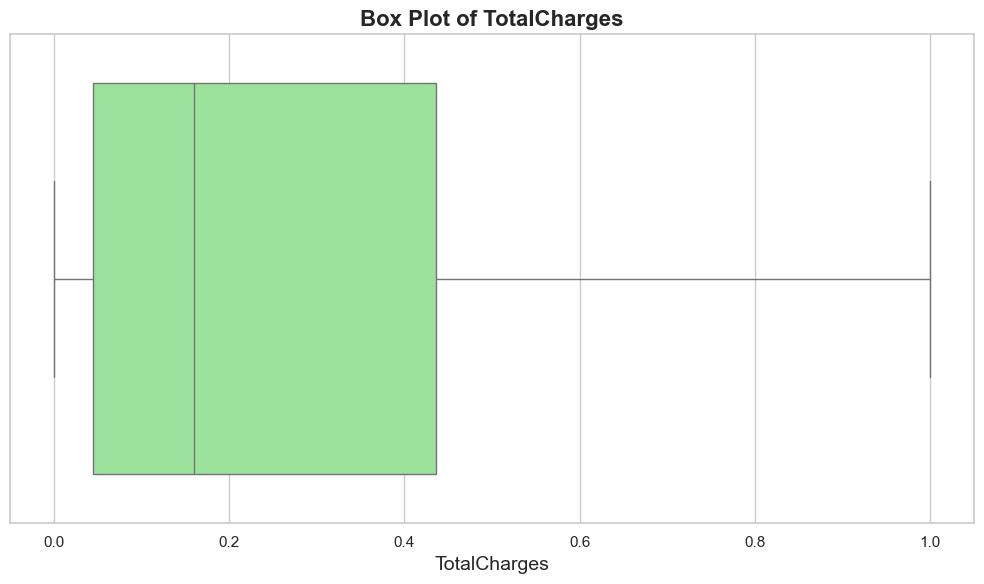

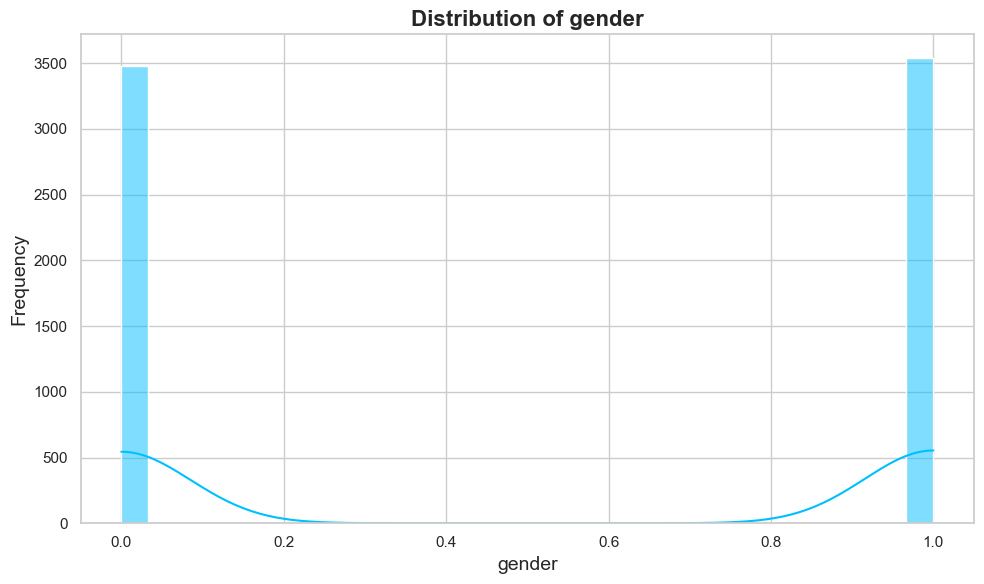

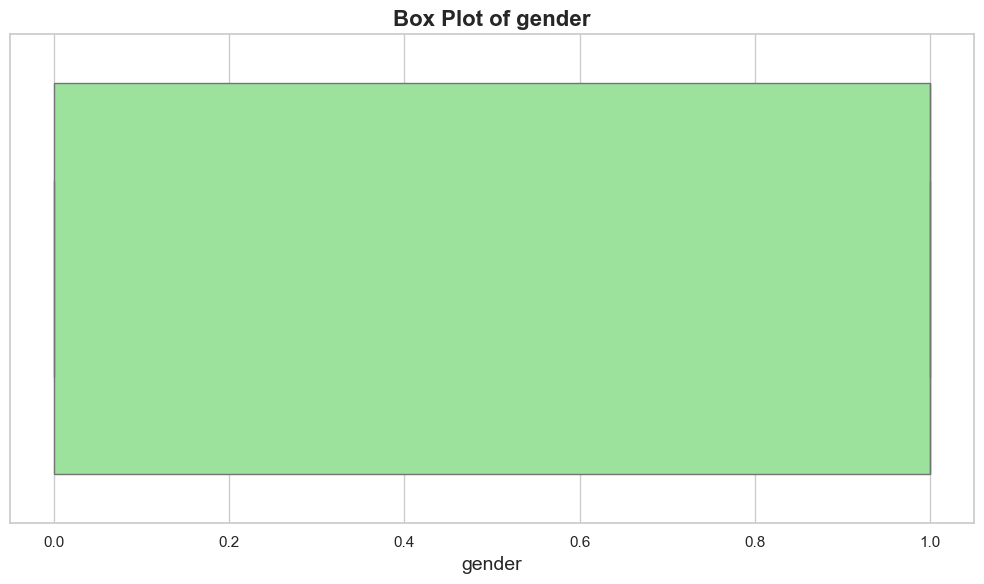

In [199]:
sns.set(style="whitegrid")  

# Continuous Variables Analysis  
continuous_vars = ['MonthlyCharges', 'TotalCharges','gender']  

for var in continuous_vars:  
    plt.figure(figsize=(10, 6))  
    
    # Histogram  
    sns.histplot(df[var], bins=30, kde=True, color='deepskyblue')  
    plt.title(f'Distribution of {var}', fontsize=16, fontweight='bold')  
    plt.xlabel(var, fontsize=14)  
    plt.ylabel('Frequency', fontsize=14)  
    plt.tight_layout()  
    plt.show() 
    # Insight: The distribution of each variable highlights key trends, such as the concentration of customers with specific monthly charges.

    # Box Plot  
    plt.figure(figsize=(10, 6))  
    sns.boxplot(x=df[var], color='lightgreen')  
    plt.title(f'Box Plot of {var}', fontsize=16, fontweight='bold')  
    plt.xlabel(var, fontsize=14)  
    plt.tight_layout()  
    plt.show()  
    # Insight: The box plot reveals outliers in both MonthlyCharges and TotalCharges, suggesting that a small group of customers might have unusually high charges.

This section explores the distribution and spread of continuous variables using histograms and box plots. 

**1. Monthly Charges**

**Histogram Insight**: 
  The distribution of Monthly Charges is fairly uniform, with some peaks at specific charge points, indicating common pricing plans.
  
**Box Plot Insight:** 
  The box plot reveals the presence of outliers, with some customers having significantly higher monthly charges, which could signal premium service plans or potential billing issues.  

**2. Total Charges**

**Histogram Insight:**
  The Total Charges distribution is right-skewed, suggesting that most customers have accumulated lower total charges, possibly due to shorter tenure or limited service usage.  
  
**Box Plot Insight:**
  The box plot highlights outliers, indicating a subset of customers with exceptionally high total charges, likely long-term users or those subscribed to multiple services.  

**3. Gender (Potential Issue)**

**Insight:**
  Including gender as a continuous variable is unusual, as gender is typically categorical. Analyzing it as continuous may lead to incorrect interpretations

**2. Multivariate Analysis

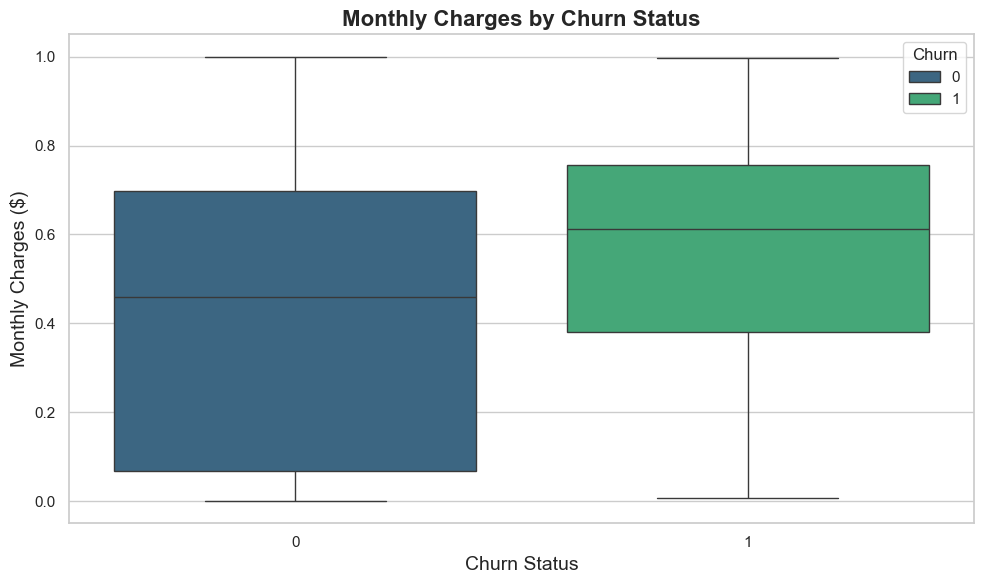

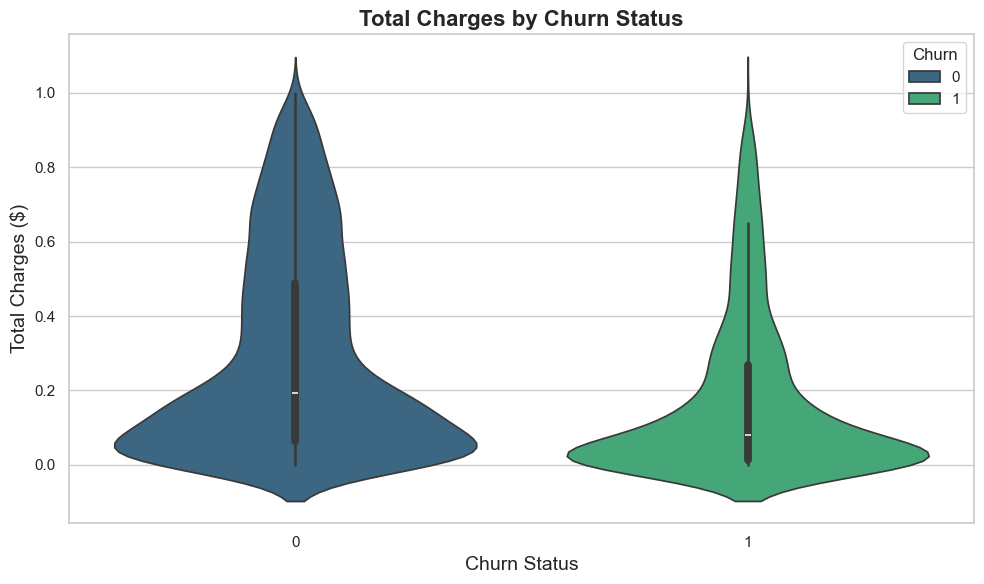

In [200]:
# Multivariate Analysis (Continuous vs. Categorical)  

# Box Plot:
plt.figure(figsize=(10, 6))  
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, hue='Churn', palette='viridis')  
plt.title('Monthly Charges by Churn Status', fontsize=16, fontweight='bold')  
plt.xlabel('Churn Status', fontsize=14)  
plt.ylabel('Monthly Charges ($)', fontsize=14)  
plt.tight_layout()  
plt.show()  

# Violin Plot:
plt.figure(figsize=(10, 6))  
sns.violinplot(x='Churn', y='TotalCharges', data=df, hue='Churn', palette='viridis')  
plt.title('Total Charges by Churn Status', fontsize=16, fontweight='bold')  
plt.xlabel('Churn Status', fontsize=14)  
plt.ylabel('Total Charges ($)', fontsize=14)  
plt.tight_layout()  
plt.show()  

This plot compares **Monthly Charges** between customers who **Churned** and those who **Did Not Churn**.  

**1. Monthly Charges by Churn Status (Box Plot)**

**Insight:**  
- Customers who churn generally have higher monthly charges compared to those who stay.
    
- The median monthly charge for churned customers is higher, indicating that high monthly fees could be a contributing factor to customer attrition.

   
- The presence of outliers in the churned group suggests that some customers are paying significantly higher charges, potentially driving dissatisfaction.

**2. Total Charges by Churn Status (Violin Plot)**

**Insight:** 
- The distribution of total charges shows that churned customers tend to have lower total charges overall, indicating that many may have left early in their tenure.
  
- The spread of total charges for non-churned customers is wider, suggesting long-term customers accumulate higher total charges.

- Understanding the combination of high monthly charges and shorter tenure might reveal patterns in early customer churn.

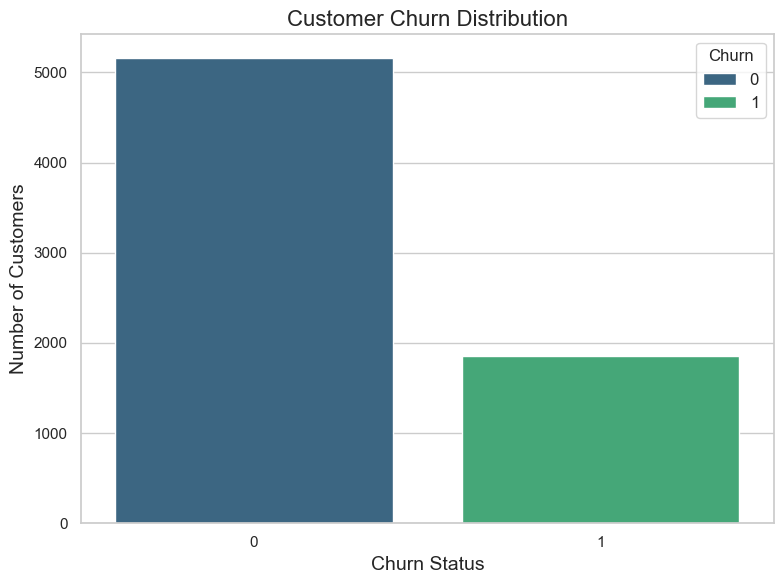

In [201]:
# Count Plot:
sns.set(style="whitegrid")   
plt.figure(figsize=(8, 6))  
sns.countplot(data=df, x='Churn', hue='Churn', palette='viridis')  
plt.title('Customer Churn Distribution', fontsize=16)  
plt.xlabel('Churn Status', fontsize=14)  
plt.ylabel('Number of Customers', fontsize=14)  
plt.legend(title='Churn', loc='upper right', fontsize=12)   
plt.tight_layout()   
plt.show()  

This plot shows the distribution of **Churned** and **Not Churned** customers.  

**Insight:** 

- The count plot shows that the number of customers who did not churn is higher than those who did.
 
- This imbalance suggests that churned customers represent a smaller portion of the dataset, which might impact model training and require techniques like resampling to handle the class imbalance.

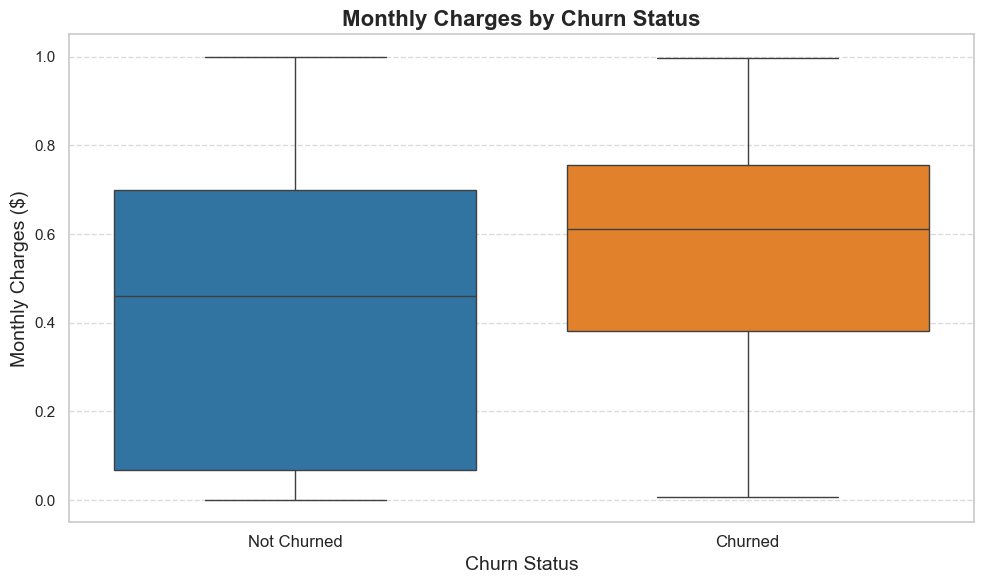

In [202]:
sns.set(style="whitegrid") 
colors = ['#1f77b4', '#ff7f0e']   
plt.figure(figsize=(10, 6))  
sns.boxplot(x='Churn', y='MonthlyCharges', hue='Churn', data=df, palette=colors, legend=False)    
plt.title('Monthly Charges by Churn Status', fontsize=16, fontweight='bold')  
plt.xlabel('Churn Status', fontsize=14)  
plt.ylabel('Monthly Charges ($)', fontsize=14)  
plt.xticks(ticks=[0, 1], labels=['Not Churned', 'Churned'], fontsize=12)     
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()   
plt.show()  

This plot compares **Monthly Charges** between customers who **Churned** and those who **Did Not Churn**.

**Insight:**

- Customers who churn tend to have higher monthly charges compared to those who stay.
  
- The median monthly charges for churned customers are noticeably higher, suggesting that pricing could be a key factor in customer churn.
   
- Additionally, the spread of monthly charges among churned customers is wider, indicating more variability in this group.
 
- Identifying and addressing the reasons behind high charges might help reduce churn rates.

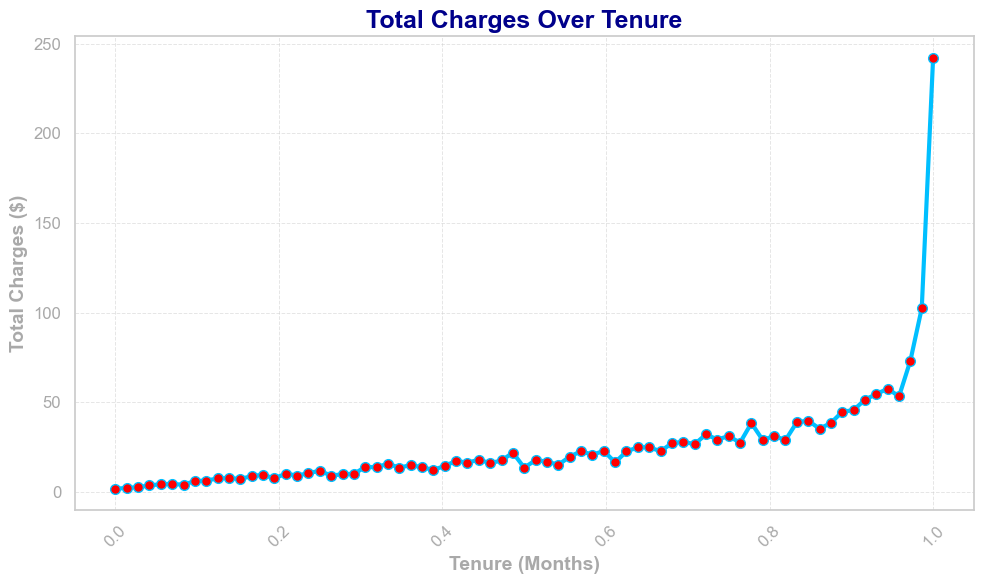

In [203]:
plt.figure(figsize=(10, 6))  
 
df.groupby('tenure')['TotalCharges'].sum().plot(  
    kind='line',  
    color='deepskyblue',  
    linewidth=3,  
    marker='o',  
    markersize=7,  
    linestyle='-',  
    markerfacecolor='red'  
)   
plt.title('Total Charges Over Tenure', fontsize=18, fontweight='bold', color='darkblue')  
plt.xlabel('Tenure (Months)', fontsize=14, fontweight='bold', color='darkgray')  
plt.ylabel('Total Charges ($)', fontsize=14, fontweight='bold', color='darkgray')   
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.5)   
plt.xticks(fontsize=12, rotation=45, color='darkgray')  
plt.yticks(fontsize=12, color='darkgray')   
plt.tight_layout()  
plt.show()  

This plot shows how **Total Charges** change over **Tenure (in months)**.  

**Insight:**
  -The plot shows a positive trend between **tenure** and **total charges**. As customers stay longer, their accumulated charges increase, which is expected.
  
  - The line’s smooth upward trajectory suggests that customers tend to accumulate charges consistently over time.
      
  - Notable spikes could indicate certain milestones, such as upgrades, added services, or pricing adjustments.
    
  - Monitoring the slope can reveal if long-term customers contribute more revenue, providing valuable insights for retention strategies.  

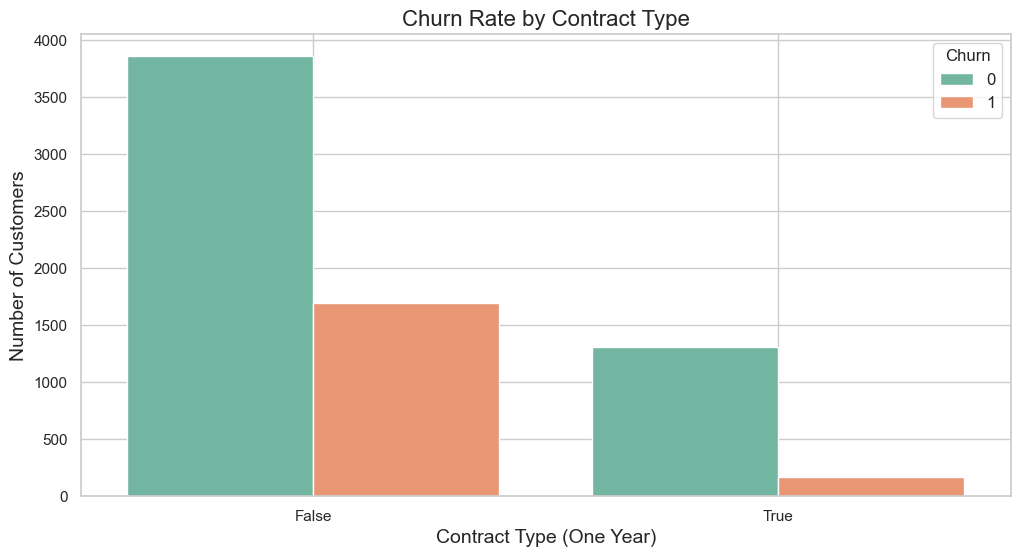

In [204]:
plt.figure(figsize=(12, 6))  
sns.countplot(data=df, x='Contract_One year', hue='Churn', palette='Set2')  
plt.title('Churn Rate by Contract Type', fontsize=16)  
plt.xlabel('Contract Type (One Year)', fontsize=14)  
plt.ylabel('Number of Customers', fontsize=14)  
plt.legend(title='Churn', fontsize=12)  
plt.xticks(rotation=0) 
plt.grid(visible=True)  
plt.show()  

This plot shows the distribution of **Churn** among customers with a **One-Year Contract**. 

**Insight:**
  The count plot shows the relationship between **one-year contracts** and **churn status**.  
  
  - Customers with **one-year contracts** tend to have a **lower churn rate** compared to those with shorter contracts.
      
  - This suggests that **longer contract durations may help improve customer retention**, possibly due to incentives like discounts or reduced hassle in renewing services.

  - Conversely, customers without one-year contracts show a **higher churn rate**, indicating they might feel less committed or more inclined to explore other providers.  

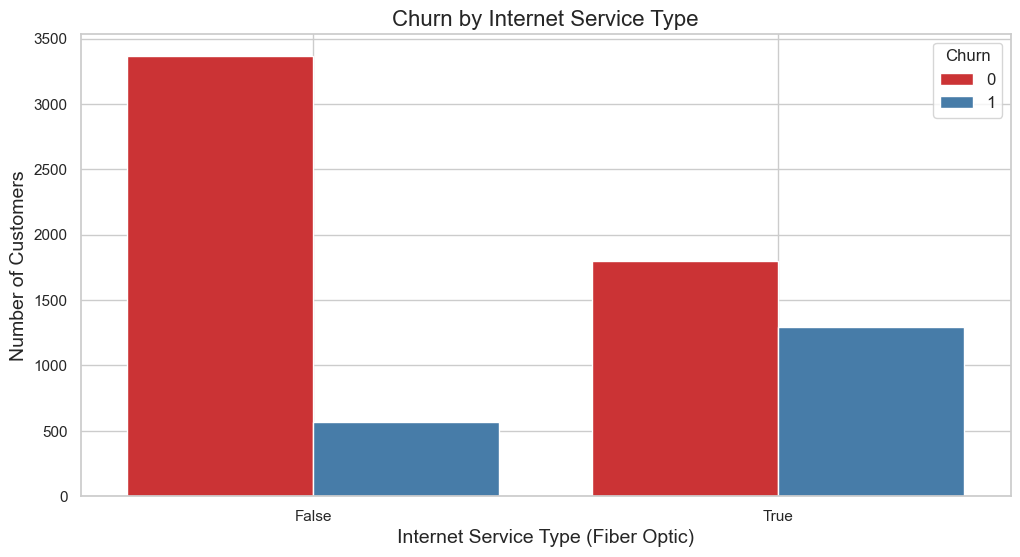

In [205]:
plt.figure(figsize=(12, 6))  
sns.countplot(data=df, x='InternetService_Fiber optic', hue='Churn', palette='Set1')   
plt.title('Churn by Internet Service Type', fontsize=16)  
plt.xlabel('Internet Service Type (Fiber Optic)', fontsize=14)  
plt.ylabel('Number of Customers', fontsize=14)  
plt.legend(title='Churn', fontsize=12)  
plt.xticks(rotation=0)  
plt.grid(visible=True)  
plt.show()  

This plot shows the distribution of **Churn** across customers with **Fiber Optic Internet Service**.  

**Insight:**

  The count plot highlights the **churn distribution among customers using fiber optic internet service**: 
  
  - Customers with **fiber optic service show a higher churn rate** compared to other internet types.
     
  - This could imply that while fiber optic offers faster speeds, there might be **underlying issues** such as **higher costs**, **service reliability concerns**, or **customer dissatisfaction** driving the churn.

  - Understanding these pain points could help in **targeting retention strategies** for fiber optic users, such as improved customer support or tailored pricing plans.

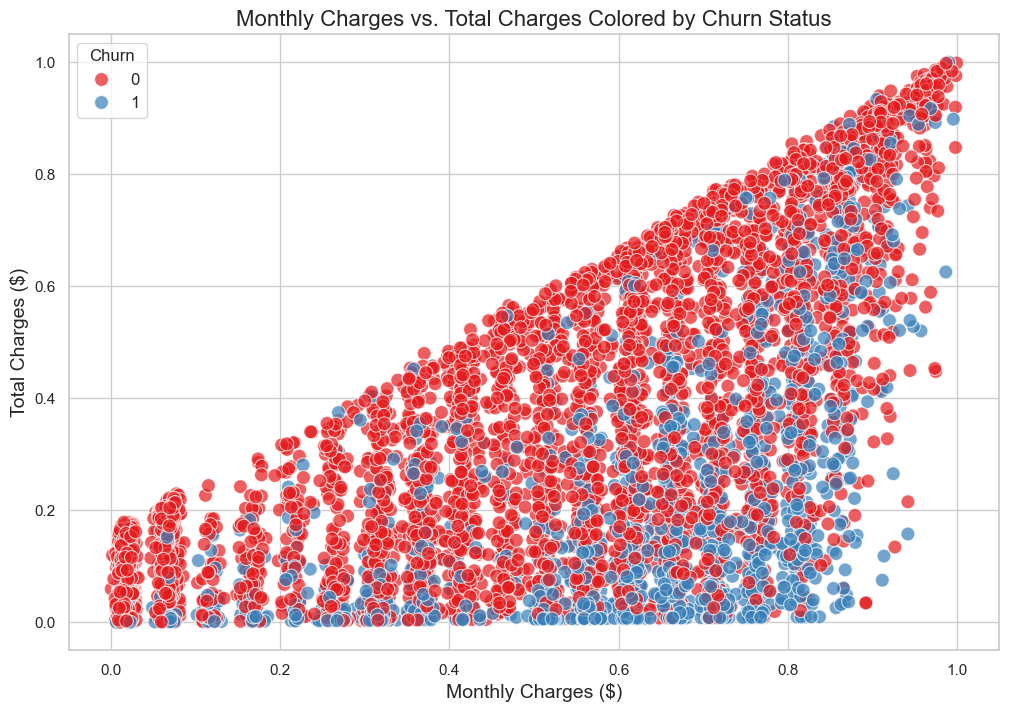

In [206]:
plt.figure(figsize=(12, 8))  
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.7, palette='Set1', s=100)  
plt.title('Monthly Charges vs. Total Charges Colored by Churn Status', fontsize=16)  
plt.xlabel('Monthly Charges ($)', fontsize=14)  
plt.ylabel('Total Charges ($)', fontsize=14)  
plt.legend(title='Churn', fontsize=12)  
plt.grid(visible=True)  

plt.show()  

This scatter plot shows the relationship between **Monthly Charges** and **Total Charges**, with points colored by **Churn Status**.  

**Insight:**

  - The scatter plot shows the relationship between **Monthly Charges** and **Total Charges**, with points colored by **Churn Status**.
    
  - **Key Observations:**  
    - **Higher Monthly Charges** tend to have a **higher churn rate**, as indicated by the concentration of churned customers in that range.
       
    - Customers with **lower Total Charges and higher Monthly Charges** are more likely to churn, suggesting they might be **newer customers
   
       dissatisfied with the pricing** or experiencing **early-stage dissatisfaction**.
   
      
    - There’s a **clear upward trend** between Monthly and Total Charges, as expected, but **churned customers show more variation**, implying they           might have different usage patterns or shorter tenures.  

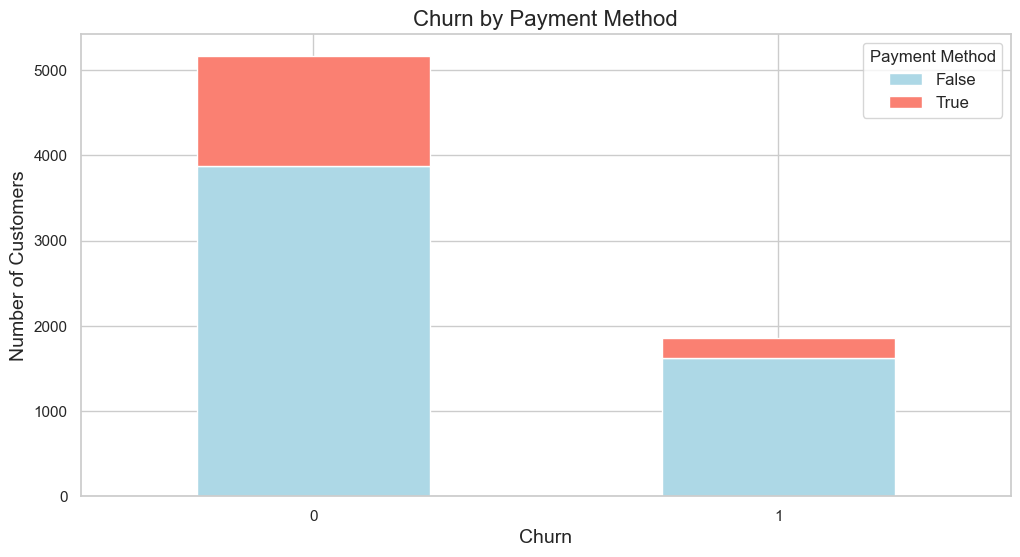

In [207]:
# Line Plot:
payment_method_counts = df.groupby(['Churn', 'PaymentMethod_Credit card (automatic)']).size().unstack()  
payment_method_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['lightblue', 'salmon'])   
plt.title('Churn by Payment Method', fontsize=16)  
plt.xlabel('Churn', fontsize=14)  
plt.ylabel('Number of Customers', fontsize=14)  
plt.xticks(rotation=0)  
plt.legend(title='Payment Method', fontsize=12)  
plt.grid(visible=True)  
plt.show()  
# Insight: Total charges increase steadily over tenure, reaffirming loyalty's impact on revenue.

This bar plot shows the distribution of customer churn across different payment methods.  

**Insight:** 
  - The plot shows the distribution of **Churn** across customers who use **Credit Card (Automatic)** as a payment method.  
  - **Key Observations:**
    
    - Customers who use **automatic credit card payments** appear to have a **lower churn rate** compared to other payment methods.
        
    - This suggests that automatic payments may help in **retaining customers**, possibly by reducing the friction of monthly payments and ensuring uninterrupted service.
   
       
    - Additionally, non-churned customers show a **higher adoption of automatic payments**, which might indicate a level of trust or long-term engagement with the service.  

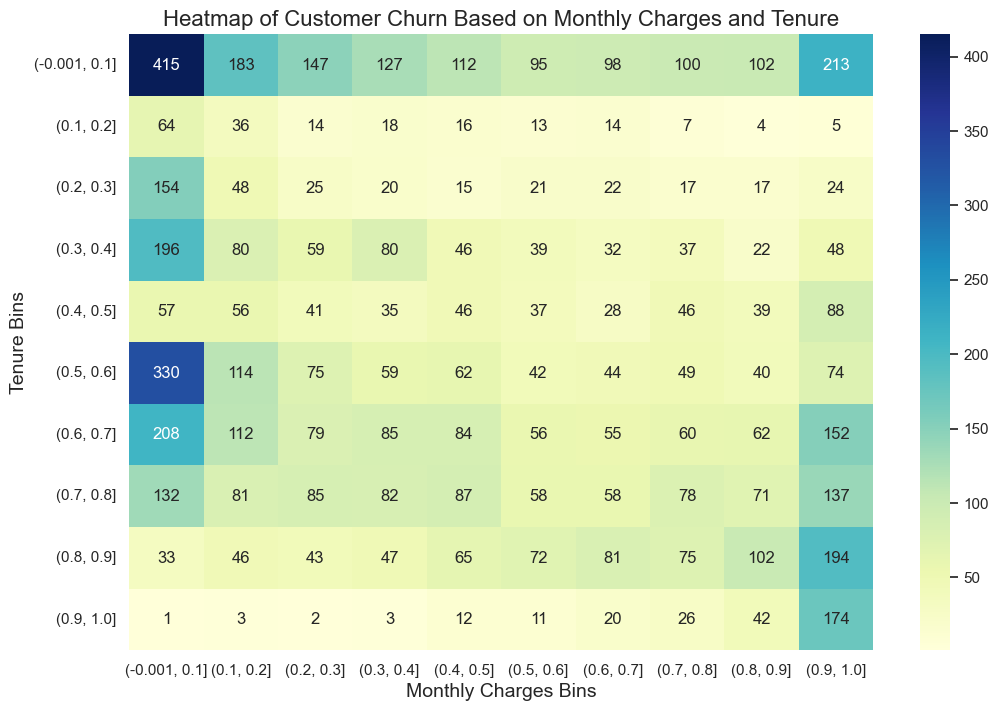

In [208]:
# Heatmap:
plt.figure(figsize=(12, 8))  
churn_heatmap_data = pd.crosstab(  
    pd.cut(df['MonthlyCharges'], bins=10),  
    pd.cut(df['tenure'], bins=10),  
    values=df['Churn'],  
    aggfunc='count'  
)  

sns.heatmap(churn_heatmap_data, cmap='YlGnBu', annot=True, fmt='g')   
plt.title('Heatmap of Customer Churn Based on Monthly Charges and Tenure', fontsize=16)  
plt.xlabel('Monthly Charges Bins', fontsize=14)  
plt.ylabel('Tenure Bins', fontsize=14)  
plt.show()  

This heatmap shows the relationship between **Monthly Charges** and **Tenure** with customer churn counts.

- **Insight:**  
  - The heatmap shows the distribution of **customer churn** across different ranges of **Monthly Charges** and **Tenure**.  
  - **Key Observations:**  
    - Customers with **higher Monthly Charges** and **shorter Tenure** seem to have a **higher churn rate**, possibly indicating dissatisfaction with pricing for newer customers.  
    - As **Tenure increases**, the number of churned customers tends to **decrease**, suggesting that long-term customers are more likely to stay.  
    - The combination of **low Monthly Charges** and **long Tenure** corresponds to fewer churn cases, hinting at a possible link between affordability and long-term retention.  
  - This insight can guide strategies such as offering **discounted rates** or **loyalty programs** to newer high-paying customers to reduce churn. 

In [209]:
print(df.columns.tolist())

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [210]:
from scipy.stats import chi2_contingency  
contingency_table = pd.crosstab(df['Partner'], df['Churn'])  
chi2, p, dof, expected = chi2_contingency(contingency_table)  
print(f"Chi-Squared: {chi2}, p-value: {p}")  

Chi-Squared: 155.47964557828, p-value: 1.0999615978939857e-35


In [211]:
correlation_matrix = df.corr()  
print(correlation_matrix['Churn'])  

gender                                  -0.008763
SeniorCitizen                            0.151619
Partner                                 -0.149135
Dependents                              -0.163459
tenure                                  -0.351508
PhoneService                             0.011323
PaperlessBilling                         0.190891
MonthlyCharges                           0.194508
TotalCharges                            -0.197911
Churn                                    1.000000
MultipleLines_No phone service          -0.011323
MultipleLines_Yes                        0.041958
InternetService_Fiber optic              0.308170
InternetService_No                      -0.228533
OnlineSecurity_No internet service      -0.228533
OnlineSecurity_Yes                      -0.170520
OnlineBackup_No internet service        -0.228533
OnlineBackup_Yes                        -0.081092
DeviceProtection_No internet service    -0.228533
DeviceProtection_Yes                    -0.064944


In [212]:
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression  
from sklearn.feature_selection import RFE   
X = df.drop(['Churn'], axis=1)  
y = df['Churn']   
X = pd.get_dummies(X, drop_first=True)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
 
model = LogisticRegression(max_iter=1000)  
rfe = RFE(model, n_features_to_select=10)   
fit = rfe.fit(X_train, y_train)  

print(f"Selected Features: {X.columns[fit.support_]}")  

Selected Features: Index(['tenure', 'PhoneService', 'TotalCharges', 'InternetService_Fiber optic',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'DeviceProtection_No internet service', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Electronic check'],
      dtype='object')


In [213]:
from sklearn.feature_selection import RFE  
from sklearn.linear_model import LogisticRegression  

X = df.drop(columns=['Churn'])  
y = df['Churn']  

model = LogisticRegression(max_iter=1000)  
rfe = RFE(estimator=model, n_features_to_select=10)  # Correct initialization  
fit = rfe.fit(X, y)  

print("Selected features: %s" % list(X.columns[fit.support_]))  

Selected features: ['tenure', 'PhoneService', 'PaperlessBilling', 'TotalCharges', 'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'DeviceProtection_No internet service', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Electronic check']


In [214]:
from scipy import stats  

# Perform t-test for MonthlyCharges  
churned = df[df['Churn'] == 1]['MonthlyCharges']  
non_churned = df[df['Churn'] == 0]['MonthlyCharges']  

t_stat, p_value = stats.ttest_ind(churned, non_churned)  

print(f"T-statistic: {t_stat}, P-value: {p_value}")  
# Interpret the p-value  
if p_value < 0.05:  
    print("There is a significant difference in MonthlyCharges between churned and non-churned customers.")  
else:  
    print("No significant difference in MonthlyCharges.") 

T-statistic: 16.613048539171103, P-value: 8.041921866095636e-61
There is a significant difference in MonthlyCharges between churned and non-churned customers.


In [215]:
# One-way ANOVA for tenure across different contract types  
anova_results = stats.f_oneway(  
    df[df['Contract_One year'] == 1]['tenure'],  
    df[df['Contract_Two year'] == 1]['tenure']  
)  

print(f"ANOVA F-statistic: {anova_results.statistic}, P-value: {anova_results.pvalue}")  
if anova_results.pvalue < 0.05:  
    print("There is a significant difference in tenure among contract types.")  
else:  
    print("No significant difference in tenure.") 

ANOVA F-statistic: 491.7064436302594, P-value: 2.1661548058656374e-101
There is a significant difference in tenure among contract types.


In [216]:
# Create a contingency table  
contingency_table = pd.crosstab(df['Partner'], df['Churn'])  

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)  

print(f"Chi-squared statistic: {chi2}, P-value: {p}")  
if p < 0.05:  
    print("There is a significant association between Partner status and churn.")  
else:  
    print("No significant association between Partner status and churn.")  

Chi-squared statistic: 155.47964557828, P-value: 1.0999615978939857e-35
There is a significant association between Partner status and churn.


In [217]:
from sklearn.feature_selection import RFE  
from sklearn.linear_model import LogisticRegression  

In [218]:
X = df.drop(columns=['Churn'])  
y = df['Churn']  

In [219]:
model = LogisticRegression(max_iter=1000)  
rfe = RFE(estimator=model, n_features_to_select=10)  # Select top 10 features  
fit = rfe.fit(X, y)  

# Output selected features  
selected_features = list(X.columns[fit.support_])  
print("Selected features:", selected_features)

Selected features: ['tenure', 'PhoneService', 'PaperlessBilling', 'TotalCharges', 'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'DeviceProtection_No internet service', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Electronic check']


In [220]:
ranking = fit.ranking_  
feature_ranking = pd.Series(ranking, index=X.columns).sort_values()  
print("Feature importance ranking:")  
print(feature_ranking)  

Feature importance ranking:
OnlineSecurity_Yes                        1
DeviceProtection_No internet service      1
PaymentMethod_Electronic check            1
Contract_One year                         1
InternetService_Fiber optic               1
TotalCharges                              1
Contract_Two year                         1
PhoneService                              1
tenure                                    1
PaperlessBilling                          1
OnlineBackup_No internet service          2
TechSupport_Yes                           3
StreamingMovies_Yes                       4
MultipleLines_Yes                         5
InternetService_No                        6
SeniorCitizen                             7
StreamingTV_Yes                           8
TechSupport_No internet service           9
MultipleLines_No phone service           10
Dependents                               11
OnlineSecurity_No internet service       12
OnlineBackup_Yes                         13
Stre

In [221]:
desc_stats = df.groupby('Churn').describe()  
print(desc_stats)  

       gender                                              SeniorCitizen  \
        count      mean       std  min  25%  50%  75%  max         count   
Churn                                                                      
0      5164.0  0.506971  0.500000  0.0  0.0  1.0  1.0  1.0        5164.0   
1      1857.0  0.497038  0.500126  0.0  0.0  0.0  1.0  1.0        1857.0   

                 ... MonthlyCharges          TotalCharges                      \
           mean  ...            75%      max        count      mean       std   
Churn            ...                                                            
0      0.128970  ...       0.698632  1.00000       5164.0  0.292983  0.268540   
1      0.255789  ...       0.756219  0.99602       1857.0  0.175695  0.218457   

                                                         
            min       25%       50%       75%       max  
Churn                                                    
0      0.000000  0.065468  0.192038  0.

In [222]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.013889,0,1,0.115423,0.001275,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,0.472222,1,0,0.385075,0.215867,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,0.027778,1,1,0.354229,0.010310,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,0.625000,0,0,0.239303,0.210241,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,0.027778,1,1,0.521891,0.015330,1,...,False,False,False,False,False,False,False,False,True,False


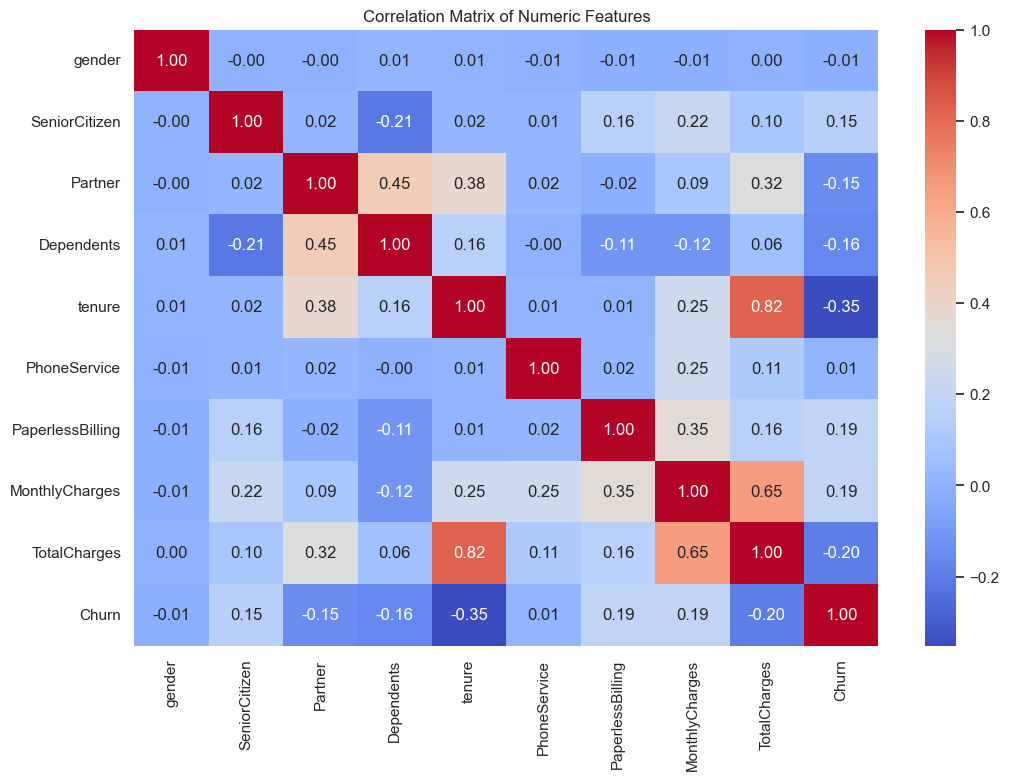

In [223]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Generate the correlation matrix for numeric features
correlation_matrix = numeric_df.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

## Feature Engineering: Customer Behavior & Engagement

In this section, we are creating new features to better understand customer behavior and enhance the performance of our analysis or predictive model. The following transformations are applied:

- **Categorizing customers by tenure** into different time-based groups.
- **Calculating average daily calls and data usage** over the past 30 days.
- **Estimating average monthly support tickets** from the last 3 months.
- **Counting the number of subscribed services**, such as phone, internet, security, and support.
- **Counting the number of streaming services** and **online protection options** used.
- **Creating an engagement score** based on service usage patterns using a weighted combination of average daily calls, data usage, and the number of services.

These engineered features aim to give a deeper insight into customer engagement and usage behavior, which is useful for churn prediction and customer segmentation.


In [224]:
import pandas as pd
import numpy as np

# Create a categorical column grouping customers based on their tenure
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0, 6, 12, 24, 48, 72],
    labels=['0–6', '7–12', '13–24', '25–48', '49+']
)

# Calculate the average number of daily calls over the last 30 days 
if 'calls_last_30d' in df.columns:
    df['avg_daily_calls'] = df['calls_last_30d'] / 30

# Calculate the average daily data usage in MB over the last 30 days 
if 'data_usage_mb_30d' in df.columns:
    df['avg_daily_data_mb'] = df['data_usage_mb_30d'] / 30

# Calculate the average number of support tickets per month 
if 'tickets_last_3m' in df.columns:
    df['tickets_per_month'] = df['tickets_last_3m'] / 3

# Define service-related binary flags to count total services used by the customer
service_flags = [
    'PhoneService',
    'MultipleLines_Yes',
    'InternetService_Fiber optic',
    'OnlineSecurity_Yes',
    'OnlineBackup_Yes',
    'DeviceProtection_Yes',
    'TechSupport_Yes',
    'StreamingTV_Yes',
    'StreamingMovies_Yes'
]

# Total number of services the customer is subscribed to
df['num_services'] = df[service_flags].sum(axis=1)

# Number of streaming services subscribed (TV and Movies)
df['num_streaming_services'] = df[['StreamingTV_Yes', 'StreamingMovies_Yes']].sum(axis=1)

# Number of online protection and support options used by the customer
df['num_online_options'] = df[['OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes']].sum(axis=1)

# Calculate an engagement score based on usage and services
# Weighted sum of average daily calls, data usage, and number of services
df['engagement_score'] = (
    df.get('avg_daily_calls', 0) * 0.4 +
    df.get('avg_daily_data_mb', 0) * 0.4 +
    df['num_services'] * 0.2
)


## Data Preprocessing: Scaling & Encoding

In this step, we prepare features for modeling by applying:

1. **Log Transformation** – Reduce skewness in `MonthlyCharges`.
2. **Min‑Max Scaling** – Normalize selected features to [0, 1].
3. **Z‑Score Standardization** – Standardize features to mean 0 and std 1.
4. **One‑Hot Encoding** – Convert `tenure_group` into binary columns.
5. **Frequency Encoding** – Rebuild `contract_type` and encode by frequency.

These transformations ensure features are on similar scales and categorical data is machine-readable.

In [225]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 1. LOG SCALING
# Apply log transformation to reduce right skewness in 'MonthlyCharges'
df['log_monthly_charges'] = np.log1p(df['MonthlyCharges'])

# 2. MIN‑MAX NORMALIZATION
# Scale features to the range [0, 1] using MinMaxScaler
scaler_mm = MinMaxScaler()
for col in ['TotalCharges','log_monthly_charges','tickets_per_month','avg_daily_calls','avg_daily_data_mb','num_services']:
    if col in df.columns:
        df[[col]] = scaler_mm.fit_transform(df[[col]])

# 3. Z‑SCORE STANDARDIZATION
# Standardize features to have mean 0 and standard deviation 1 using StandardScaler
scaler_z = StandardScaler()
for col in ['num_services','num_streaming_services','num_online_options','contract_freq_enc']:
    if col in df.columns:
        df[[col]] = scaler_z.fit_transform(df[[col]])

# 4. ONE‑HOT ENCODING
# Convert categorical 'tenure_group' into dummy variables (binary columns)
df = pd.get_dummies(df, columns=[c for c in ['tenure_group'] if c in df.columns], drop_first=True)

# 5. FREQUENCY ENCODING
# Reconstruct 'contract_type' from individual contract columns and encode frequencies
if all(c in df.columns for c in ['Contract_One year','Contract_Two year']):
    def map_contract(r):
        if r['Contract_One year']: return 'One year'
        if r['Contract_Two year']: return 'Two year'
        return 'Month-to-month'
    df['contract_type'] = df.apply(map_contract, axis=1)
    # Calculate frequency of each contract type
    freq = df['contract_type'].value_counts(normalize=True)
    df['contract_freq_enc'] = df['contract_type'].map(freq)

In [226]:
# After running all feature‑engineering steps:
# Simply display the first 5 rows of the entire DataFrame
print(df.head())

   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0  0.013889             0   
1       1              0        0           0  0.472222             1   
2       1              0        0           0  0.027778             1   
3       1              0        0           0  0.625000             0   
4       0              0        0           0  0.027778             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1        0.115423      0.001275      0  ...   
1                 0        0.385075      0.215867      0  ...   
2                 1        0.354229      0.010310      1  ...   
3                 0        0.239303      0.210241      0  ...   
4                 1        0.521891      0.015330      1  ...   

   num_streaming_services  num_online_options  engagement_score  \
0               -0.908445           -0.209520               0.2   
1               -0.908445           

In [227]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,num_services,num_streaming_services,num_online_options,log_monthly_charges,contract_freq_enc
count,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7.021000e+03,7.021000e+03,7.021000e+03,7021.000000,7021.000000
mean,0.504344,0.162512,0.484546,0.300527,0.450965,0.902863,0.592651,0.463700,0.261961,0.264492,-1.755863e-16,4.958922e-17,-1.265031e-17,0.517330,0.403461
std,0.500017,0.368947,0.499797,0.458520,0.340763,0.296166,0.491376,0.299194,0.261403,0.441094,1.000071e+00,1.000071e+00,1.000071e+00,0.310775,0.160626
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.669166e+00,-9.084454e-01,-9.866125e-01,0.000000,0.209799
25%,0.000000,0.000000,0.000000,0.000000,0.125000,1.000000,0.000000,0.174129,0.045275,0.000000,-7.930615e-01,-9.084454e-01,-9.866125e-01,0.231591,0.241419
50%,1.000000,0.000000,0.000000,0.000000,0.402778,1.000000,1.000000,0.518905,0.159445,0.000000,8.304342e-02,-9.084454e-01,-2.095196e-01,0.603032,0.548782
75%,1.000000,0.000000,1.000000,1.000000,0.763889,1.000000,1.000000,0.712935,0.436522,1.000000,9.591484e-01,1.436910e+00,5.675733e-01,0.776471,0.548782
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.273306e+00,1.436910e+00,2.121759e+00,1.000000,0.548782


## Visualization: Churn by Tenure

This chart shows the distribution of customer churn across different tenure periods. It helps identify if customers with shorter or longer tenure are more likely to churn.


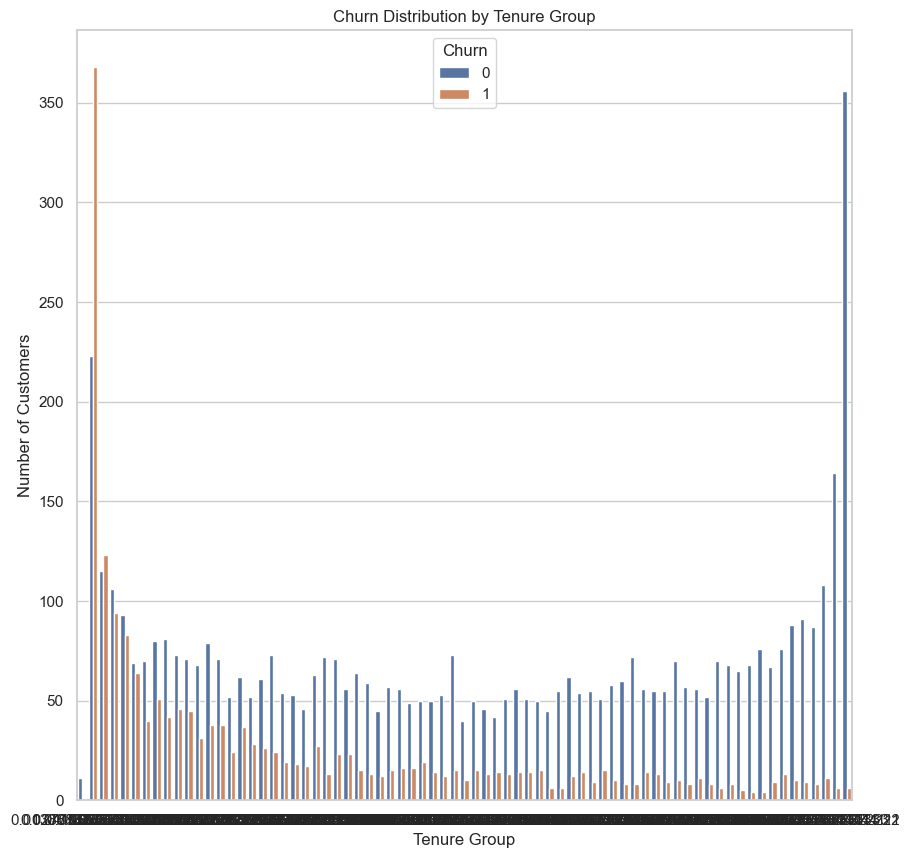

In [228]:
sns.countplot(x='tenure', hue='Churn', data=df)
plt.title('Churn Distribution by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.show()

## Visualization: Overall Churn Distribution

This plot displays the overall distribution of churned vs. non-churned customers, giving a quick overview of class imbalance in the dataset.

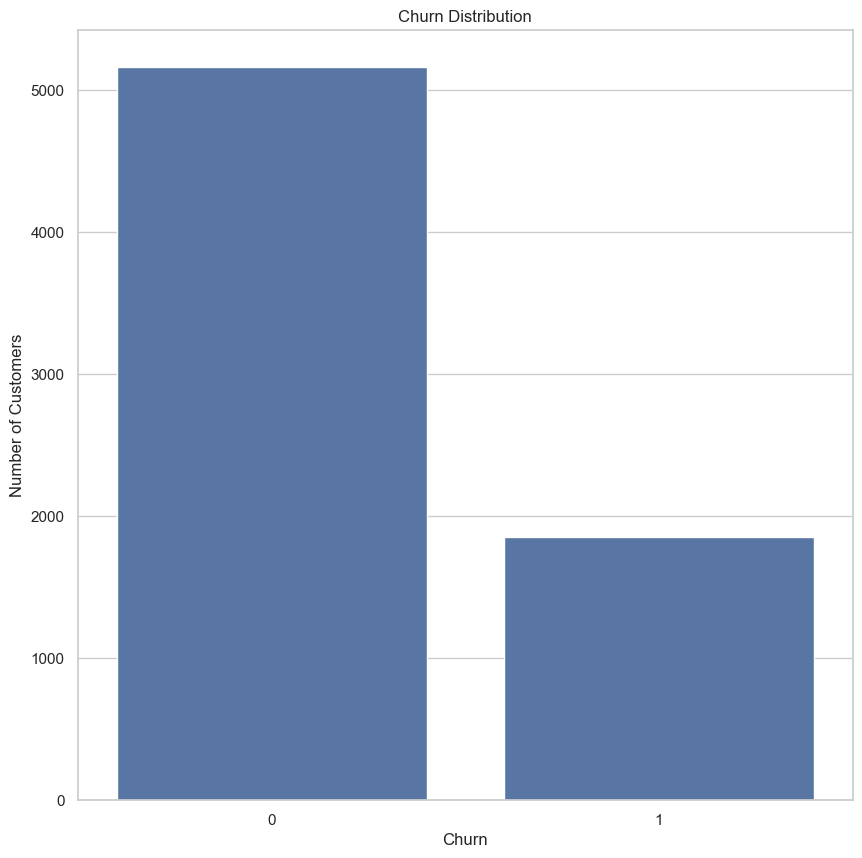

In [229]:
# Count plot for churn distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

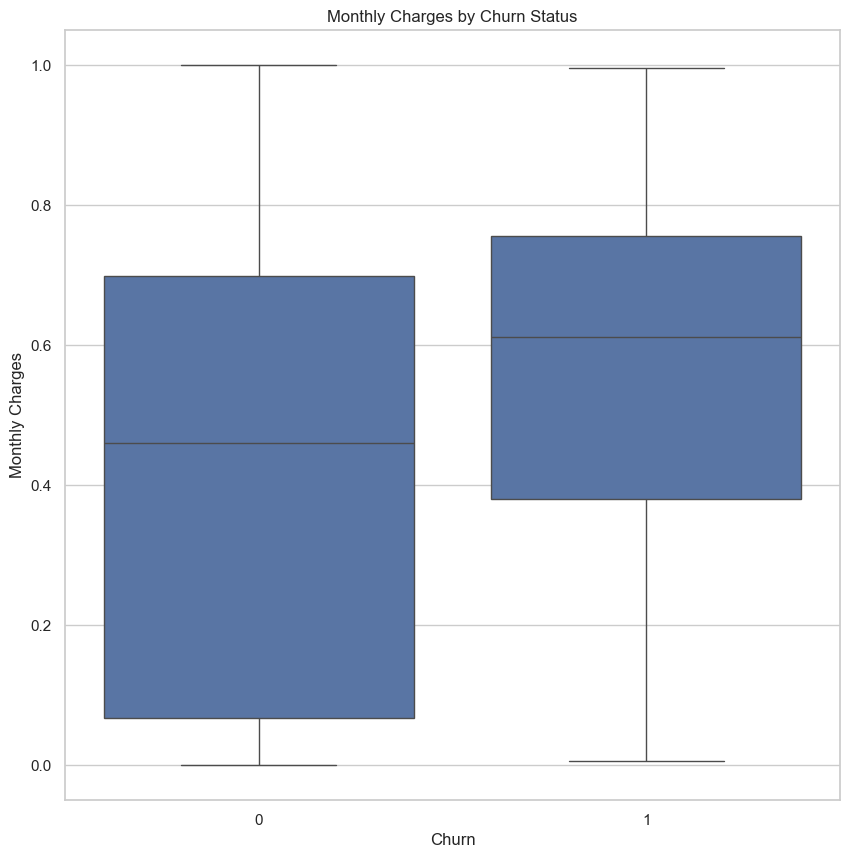

In [230]:
# Box plot for monthly charges by churn status
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

## Visualization: Churn by Contract Type

This stacked bar chart shows how churn is distributed across different contract types. It helps reveal whether customers with specific contract durations (e.g., one-year or two-year) are more or less likely to churn.

<Figure size 1000x600 with 0 Axes>

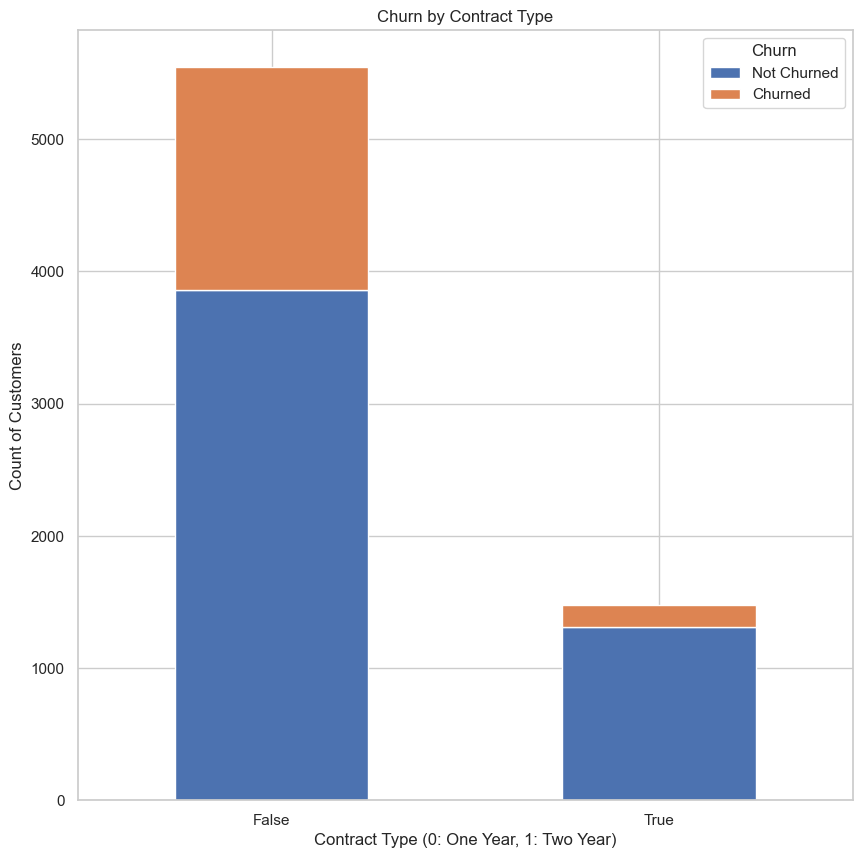

In [231]:
plt.figure(figsize=(10, 6))  
contract_counts = df.groupby(['Contract_One year', 'Churn']).size().unstack()  
contract_counts.plot(kind='bar', stacked=True)  
plt.title('Churn by Contract Type')  
plt.xlabel('Contract Type (0: One Year, 1: Two Year)')  
plt.ylabel('Count of Customers')  
plt.xticks(rotation=0)  
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])  
plt.show()  

In [232]:
pip install dash

Note: you may need to restart the kernel to use updated packages.


## Interactive Dashboard: Monthly Charges Histogram

This Dash app displays an interactive histogram of `MonthlyCharges`, colored by churn status. It allows users to visually explore how monthly charges relate to churn behavior.

In [233]:
import dash
from dash import dcc, html
import plotly.express as px

# Initialize Dash app
app = dash.Dash(__name__)

# Sample figure
fig = px.histogram(df, x='MonthlyCharges', color='Churn', barmode='overlay')

# Layout
app.layout = html.Div(children=[
    html.H1(children='Customer Churn Dashboard'),
    dcc.Graph(
        id='monthly-charges-histogram',
        figure=fig
    )
])

# Run app
if __name__ == '__main__':
    app.run(debug=True)